In [33]:
import pandas as pd

# Load the dataset
# Replace 'complaints_dataset.csv' with the actual path to your dataset
data = pd.read_csv('complaints.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display the column names
print("\nColumn Names:")
print(data.columns)

# Get the shape of the dataset
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset Preview:
  Date received                                            Product  \
0    2021-08-02                                    Debt collection   
1    2021-08-02  Credit reporting, credit repair services, or o...   
2    2014-08-08                                           Mortgage   
3    2016-09-07                                           Mortgage   
4    2018-01-11  Credit reporting, credit repair services, or o...   

                      Sub-product  \
0                Credit card debt   
1  Other personal consumer report   
2                  Other mortgage   
3     Conventional fixed mortgage   
4                Credit reporting   

                                               Issue  \
0  Took or threatened to take negative or legal a...   
1               Incorrect information on your report   
2           Loan servicing, payments, escrow account   
3                     Credit decision / Underwriting   
4               Incorrect information on your report   

  

In [34]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Value Percentage:")
print(missing_percentage)



Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        756275
Consumer complaint narrative    4562853
Company public response         3470982
Company                               0
State                             49029
ZIP code                          30229
Tags                            6309317
Consumer consent provided?      1242471
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              6085456
Complaint ID                          0
dtype: int64

Missing Value Percentage:
Date received                    0.000000
Product                          0.000000
Sub-product                      3.433076
Issue                            0.000088
Sub-issue                       11.034444
Consumer comp

Steps to clean the data

Step 1: Drop Columns with Excessive Missing Data
Reasoning: Columns like Tags (92% missing), Consumer disputed? (88% missing), and Consumer complaint narrative (66% missing) have too many missing values to be useful for analysis.

In [35]:
# Drop columns with excessive missing data
data.drop(columns=['Tags', 'Consumer disputed?'], inplace=True)


Handle Missing Values in the Narrative
Since 'Consumer complaint narrative' has many missing values, you can:

Fill missing values with a placeholder like "No narrative provided".
Drop rows with missing narratives if they are critical.

In [36]:
# Fill missing narratives with a placeholder
data['Consumer complaint narrative'].fillna('No narrative provided', inplace=True)


Step 2: Fill Missing Values in Key Columns
State: Replace missing values with "Unknown".

ZIP code: Replace missing values with a placeholder like 00000.

Sub-product and Sub-issue: Replace missing values with "Unknown".

Consumer consent provided?: Replace missing values with "Unknown".

Company public response: Replace missing values with "No response".

In [37]:
# Fill missing values
data['State'].fillna('Unknown', inplace=True)
data['ZIP code'].fillna('00000', inplace=True)
data['Sub-product'].fillna('Unknown', inplace=True)
data['Sub-issue'].fillna('Unknown', inplace=True)
data['Consumer consent provided?'].fillna('Unknown', inplace=True)
data['Company public response'].fillna('No response', inplace=True)


Step 3: Drop Rows with Missing Values in Critical Columns
For columns like Issue or Company response to consumer that are critical for the analysis, drop rows with missing values.

In [38]:
# Drop rows where 'Issue' or 'Company response to consumer' is missing
data.dropna(subset=['Issue', 'Company response to consumer'], inplace=True)


Verify Data Cleaning
After applying the above steps, verify the changes to ensure missing values are appropriately handled.

In [39]:
# Check for missing values again
print("Missing Values After Cleaning:")
print(data.isnull().sum())

# Check the shape of the dataset after cleaning
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns after cleaning.")


Missing Values After Cleaning:
Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
dtype: int64

Dataset contains 6853740 rows and 16 columns after cleaning.


Steps for EDA
1. Basic Overview of the Dataset
This provides a summary of your data after cleaning.

In [40]:
# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(data.head())

# Check the shape of the dataset
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Check column data types
print("\nData Types:")
print(data.dtypes)


Cleaned Dataset Preview:
  Date received                                            Product  \
0    2021-08-02                                    Debt collection   
1    2021-08-02  Credit reporting, credit repair services, or o...   
2    2014-08-08                                           Mortgage   
3    2016-09-07                                           Mortgage   
4    2018-01-11  Credit reporting, credit repair services, or o...   

                      Sub-product  \
0                Credit card debt   
1  Other personal consumer report   
2                  Other mortgage   
3     Conventional fixed mortgage   
4                Credit reporting   

                                               Issue  \
0  Took or threatened to take negative or legal a...   
1               Incorrect information on your report   
2           Loan servicing, payments, escrow account   
3                     Credit decision / Underwriting   
4               Incorrect information on your repor

2. Distribution of the Product Column
This helps you understand the most common complaint categories.


Complaint Count by Product:
Product
Credit reporting or other personal consumer reports                             2434043
Credit reporting, credit repair services, or other personal consumer reports    2163869
Debt collection                                                                  659809
Mortgage                                                                         409347
Checking or savings account                                                      242354
Credit card or prepaid card                                                      206373
Credit card                                                                      177335
Credit reporting                                                                 140429
Student loan                                                                      95588
Bank account or service                                                           86205
Money transfer, virtual currency, or money service                                7

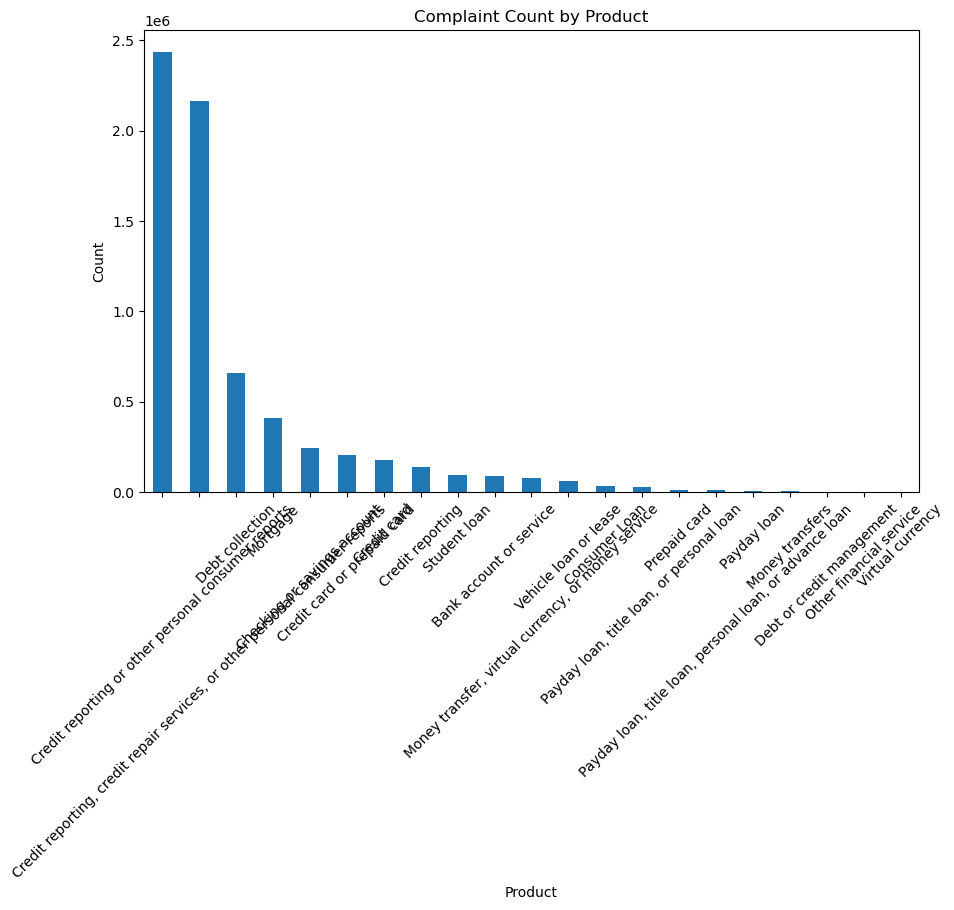

In [41]:
import matplotlib.pyplot as plt

# Count of complaints per product
product_counts = data['Product'].value_counts()

# Display counts
print("\nComplaint Count by Product:")
print(product_counts)

# Bar plot
product_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Complaint Count by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


3. Distribution of the Issue Column
Understanding the most common issues reported.


Complaint Count by Issue:
Issue
Incorrect information on your report                                                2238786
Improper use of your report                                                         1246178
Problem with a credit reporting company's investigation into an existing problem     589336
Problem with a company's investigation into an existing problem                      497906
Attempts to collect debt not owed                                                    252964
Managing an account                                                                  146251
Written notification about debt                                                      126463
Loan modification,collection,foreclosure                                             112306
Incorrect information on credit report                                               102684
Trouble during payment process                                                        87297
Name: count, dtype: int64


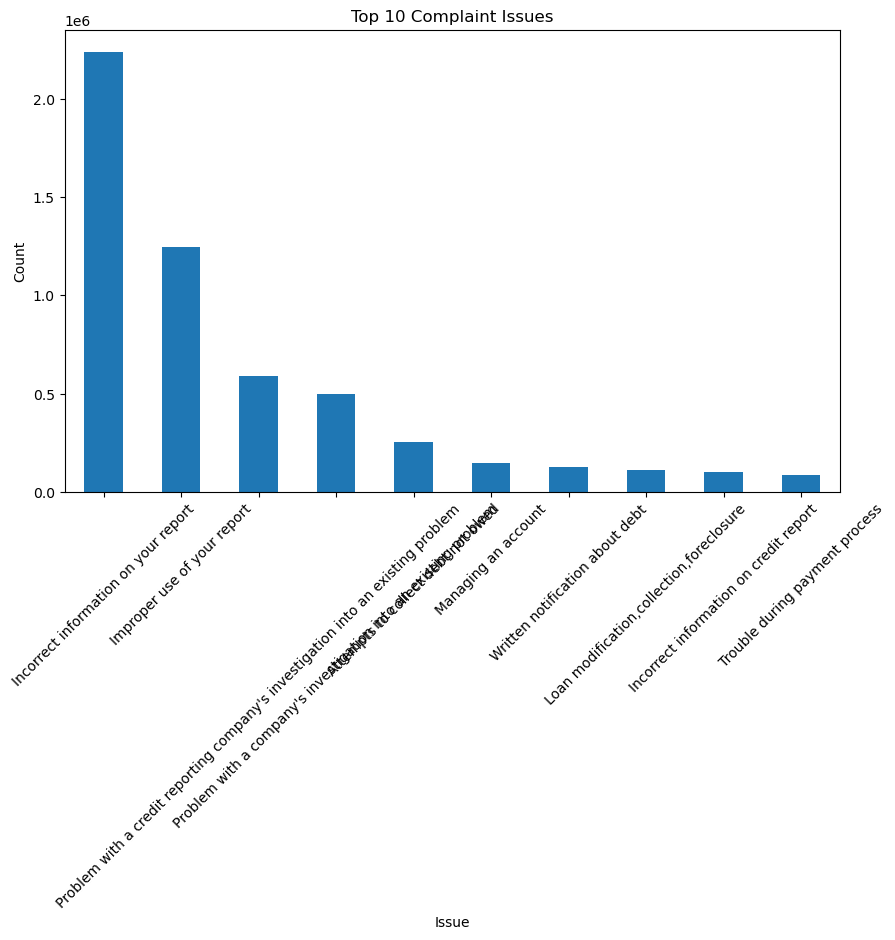

In [42]:
# Count of complaints per issue
issue_counts = data['Issue'].value_counts()

# Display counts
print("\nComplaint Count by Issue:")
print(issue_counts.head(10))  # Display top 10 issues

# Bar plot for the top 10 issues
issue_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Complaint Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


4. Geographical Distribution of Complaints
Analyzing the number of complaints by state.


Complaint Count by State:
State
FL    866297
TX    775580
CA    753786
GA    479350
NY    445789
PA    320938
IL    290240
NJ    238379
NC    220883
MD    179040
Name: count, dtype: int64


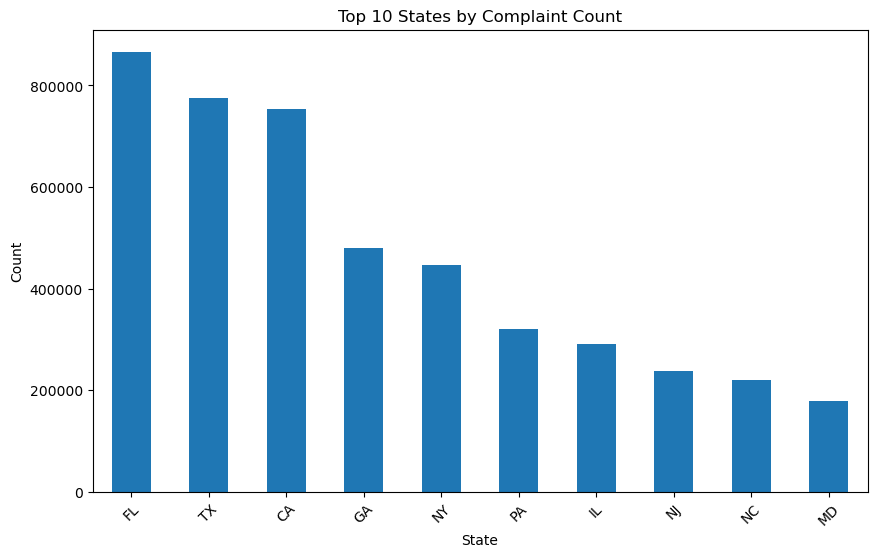

In [43]:
# Count of complaints by state
state_counts = data['State'].value_counts()

# Display counts
print("\nComplaint Count by State:")
print(state_counts.head(10))  # Display top 10 states

# Bar plot for the top 10 states
state_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 States by Complaint Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


5. Consumer Consent Analysis
Examining the distribution of consumer consent responses.


Consumer Consent Provided Distribution:
Consumer consent provided?
Consent not provided    3010200
Consent provided        2292469
Unknown                 1242466
Other                    297894
Consent withdrawn         10711
Name: count, dtype: int64


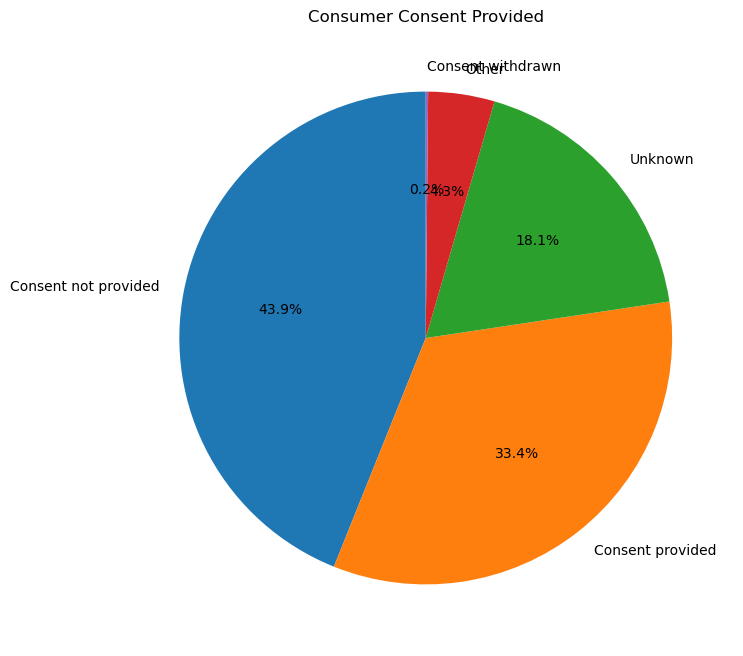

In [44]:
# Count of consumer consent responses
consent_counts = data['Consumer consent provided?'].value_counts()

# Display counts
print("\nConsumer Consent Provided Distribution:")
print(consent_counts)

# Pie chart
consent_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Consumer Consent Provided')
plt.ylabel('')
plt.show()


6. Timely Response Analysis
Understanding how often companies respond to complaints on time.


Timely Response Distribution:
Timely response?
Yes    6791323
No       62417
Name: count, dtype: int64


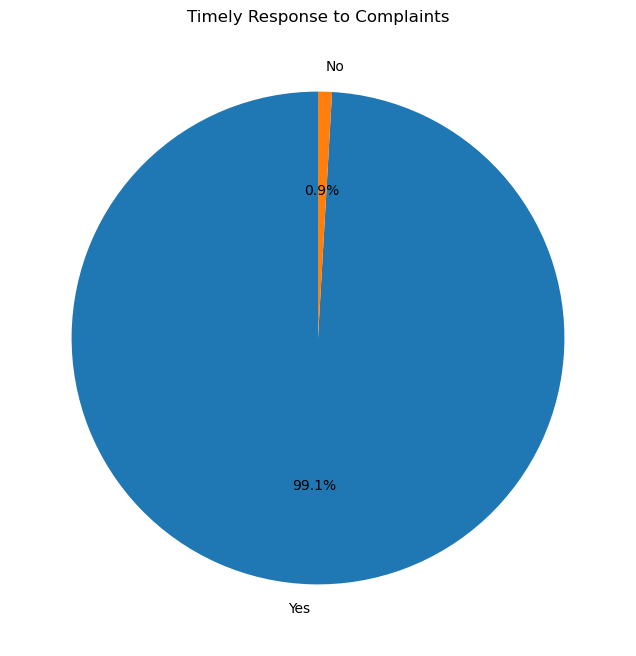

In [45]:
# Count of timely responses
timely_counts = data['Timely response?'].value_counts()

# Display counts
print("\nTimely Response Distribution:")
print(timely_counts)

# Pie chart
timely_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Timely Response to Complaints')
plt.ylabel('')
plt.show()


7. Exploring Relationships Between Features
Check how Product correlates with Issue.
Explore how State relates to Product.


Product vs Issue Matrix (Top 5 Products):
Issue                        APR or interest rate  \
Product                                             
Bank account or service                       0.0   
Checking or savings account                   0.0   
Consumer Loan                                 0.0   
Credit card                                5506.0   
Credit card or prepaid card                   0.0   

Issue                        Account opening, closing, or management  \
Product                                                                
Bank account or service                                      37961.0   
Checking or savings account                                      0.0   
Consumer Loan                                                    0.0   
Credit card                                                      0.0   
Credit card or prepaid card                                      0.0   

Issue                        Account terms and changes  Adding money  \
Product 

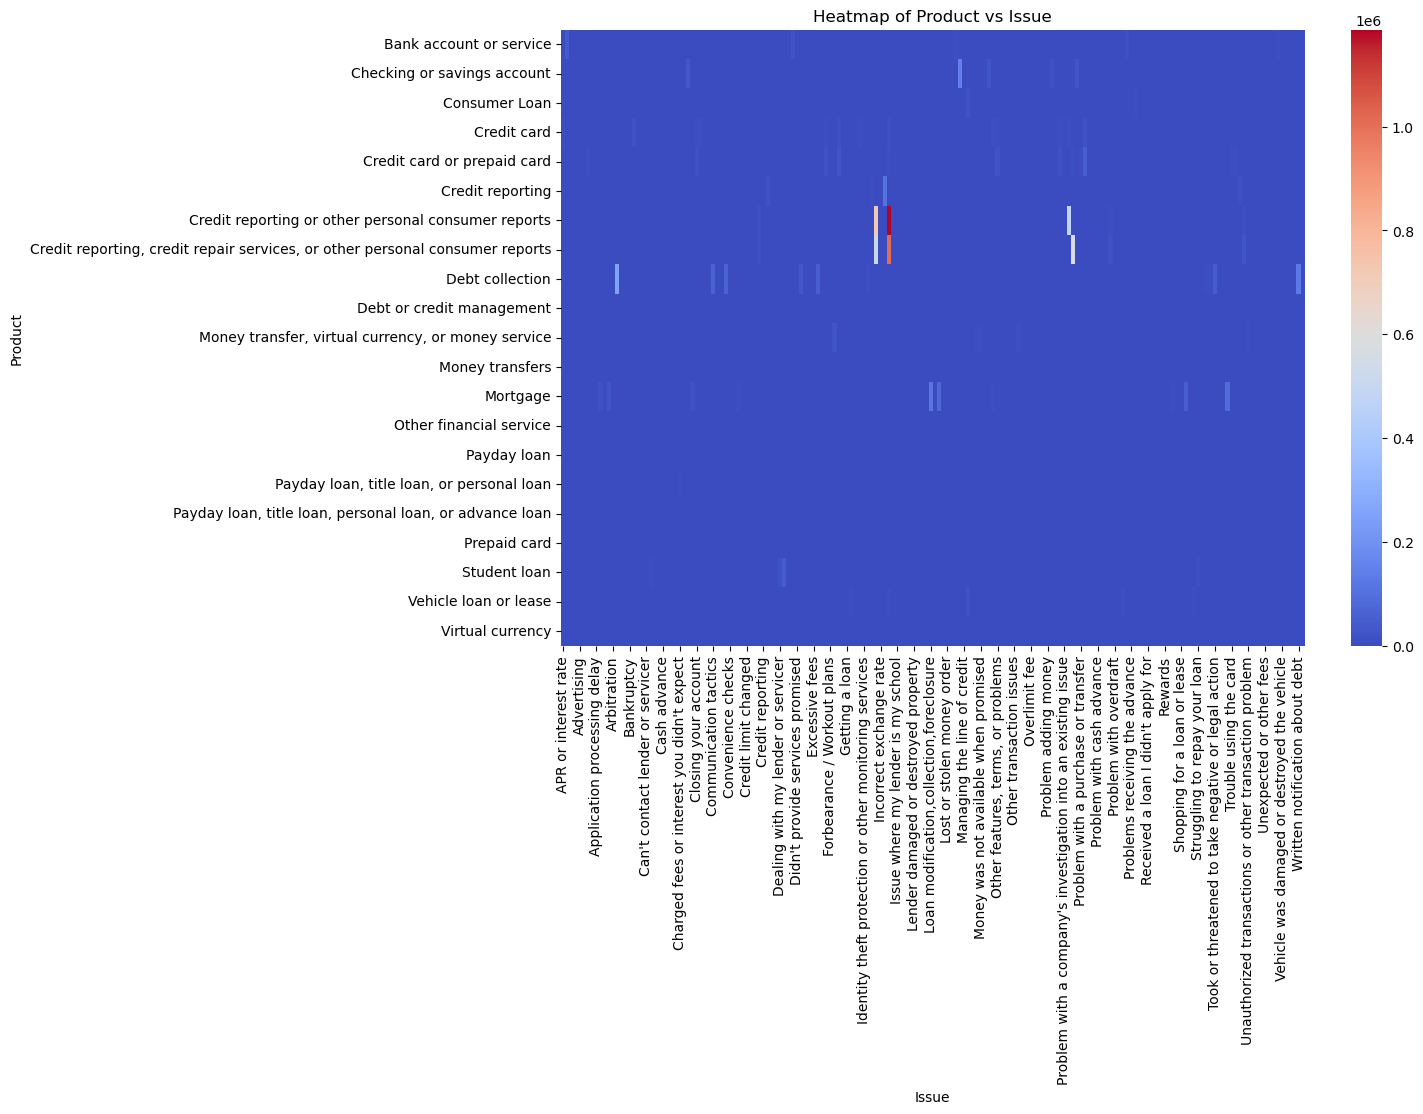

In [46]:
# Product vs Issue
product_issue_counts = data.groupby(['Product', 'Issue']).size().unstack().fillna(0)

print("\nProduct vs Issue Matrix (Top 5 Products):")
print(product_issue_counts.head())

# Heatmap (Optional: Requires Seaborn library)
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(product_issue_counts, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Product vs Issue')
plt.ylabel('Product')
plt.xlabel('Issue')
plt.show()


2. Clean the Text Data
Clean the Consumer complaint narrative to make it suitable for modeling:

Remove special characters and punctuation.
Convert text to lowercase.
Remove stopwords (optional).

In [ ]:
#! pip install stopwords

In [47]:
#import re
from nltk.corpus import stopwords

# Ensure NLTK stopwords are downloaded
import nltk
nltk.download('stopwords')

def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning
data['cleaned_text'] = data['Consumer complaint narrative'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anshul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Encode Categorical Features
Use LabelEncoder or OneHotEncoder to encode categorical columns like Product, State, and Submitted via.

In [48]:
#Label Encoding (For Target Variable)
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data['encoded_product'] = label_encoder.fit_transform(data['Product'])


In [49]:
#One-Hot Encoding (For Categorical Features)
# One-hot encode categorical columns
categorical_features = ['State', 'Submitted via']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)


4. Vectorize the Text Data
Use TfidfVectorizer to convert the cleaned text into numerical features.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)

# Transform the cleaned text
X_text = tfidf.fit_transform(data['cleaned_text'])


MemoryError: 

5. Combine Features
Combine text features with one-hot encoded categorical features for modeling.

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix, hstack

# Label encode categorical features
label_encoders = {}
for col in ['State', 'Submitted via']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# TF-IDF vectorization with reduced feature size
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(data['cleaned_text'])

# Convert categorical features to a sparse matrix
X_categorical_sparse = csr_matrix(data[['State', 'Submitted via']].to_numpy())

# Combine the sparse matrices
X_combined = hstack([X_text, X_categorical_sparse])

# Target variable
y = data['encoded_product']


MemoryError: 

In [62]:
from scipy.sparse import hstack
X_categorical = data_encoded.drop(columns=['Consumer complaint narrative', 'cleaned_text', 'Product', 'encoded_product'])
# Convert categorical features to a sparse matrix
from scipy.sparse import csr_matrix
X_categorical_sparse = csr_matrix(X_categorical.to_numpy())

# Combine the sparse matrices
X_combined = hstack([X_text, X_categorical_sparse])


MemoryError: Unable to allocate 4.14 GiB for an array with shape (81, 6853740) and data type object

In [59]:
import numpy as np

# Combine text and categorical features
X_categorical = data_encoded.drop(columns=['Consumer complaint narrative', 'cleaned_text', 'Product', 'encoded_product'])
X_combined = np.hstack([X_text.toarray(), X_categorical.to_numpy()])

# Target variable
y = data['encoded_product']


MemoryError: Unable to allocate 255. GiB for an array with shape (6853740, 5000) and data type float64

In [ ]:
import numpy as np

# Combine text and categorical features
X_categorical = data_encoded.drop(columns=['Consumer complaint narrative', 'cleaned_text', 'Product', 'encoded_product'])
from scipy.sparse import hstack

# Convert categorical features to a sparse matrix
from scipy.sparse import csr_matrix
X_categorical_sparse = csr_matrix(X_categorical.to_numpy())

# Combine the sparse matrices
X_combined = hstack([X_text, X_categorical_sparse])



#X_combined = np.hstack([X_text, X_categorical.to_numpy()])

# Target variable
y = data['encoded_product']


TypeError: no supported conversion for types: (dtype('O'),)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Flatten
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
# Assuming the dataset has 'complaint_text' and 'category' columns
df = pd.read_csv("complaints.csv")

# Text preprocessing and label encoding
X = df['complaint_text']
y = df['category']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF for Random Forest
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Tokenizer for Neural Networks
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Neural Network
def build_nn_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=100),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

nn_model = build_nn_model(input_dim=5000)
nn_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))
nn_pred = nn_model.predict(X_test_seq).argmax(axis=1)

# Convolutional Neural Network
def build_cnn_model(input_dim):
    model = Sequential([
        Embedding(input_dim, 128, input_length=100),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model(input_dim=5000)
cnn_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))
cnn_pred = cnn_model.predict(X_test_seq).argmax(axis=1)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

# Evaluate Models
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))

print("Convolutional Neural Network Classification Report:")
print(classification_report(y_test, cnn_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Accuracy Scores
print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_pred):.2f}")
print(f"Convolutional Neural Network Accuracy: {accuracy_score(y_test, cnn_pred):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")


KeyError: 'complaint_text'